[Project Guideline](https://drive.google.com/file/d/1GX6Ws_v4N0PVlBfOKX5tJGQXFsCk4FR1/view?usp=sharing)
# Work
Task1: Coding - Done
- Code Iterative deepening: Hiệp, Trang
- Code A* search: Hưng, Huy
- Deadline: 23h59p tối thứ 5 tuần sau


Task2: Cải thiện Iterative Deepening - **Hiệp**
- Lợi ích cho người làm: Phát triển khả năng đọc hiểu tiếng anh và kiến thức bound cho thi cuối kì
- Cần hoàn thành: 
    - Nghiên cứu những cách tiếp cận trên mạng và cải thiện thuật toán bằng branch and bound
    - Trình bày hàm cho Hưng để đưa vào code

  <br>


Task3: Lên khung report - **Huy**
- Lợi ích cho người làm: Khả năng research, trình bày báo cáo đồ án chuyên nghiệp, khả năng dẫn dắt
- Cần hoàn thành:
    > 1. Dựa vào gợi ý về report của cô trong guildline và các report tham khảo trên mạng, lên những gợi ý về nội dung sẽ trình bày trong từng phần
    > 2. Mỗi phần sẽ bao gồm: mô tả kiểu nội dung, cách trình bày (bảng, biểu đồ, hình ảnh...), lưu ý (nếu có) và gợi ý nội dung
    > 3. Giải thích và phân việc cho người mọi người viết các phần


Task4: Hoàn thành code và chạy data - **Hưng**
- Lợi ích cho người làm: Cải thiện khả năng sắp xếp code và chuẩn hóa code
- Cần hoàn thành:
    >1. Thống nhất code sao cho tối giản và đẹp nhất có thể
    >2. Làm hàm random data và chạy thử

Task5: Làm slide - **Trang**
- Lợi ích cho người làm: Phát triển khả năng Tiếng anh, thiết kế slide
- Cần hoàn thành:
    > 1. Thống nhất nội dung làm slide với người làm report để 2 thứ đó đồng bộ với nhau, chú ý tham khảo gợi ý về slide trong guideline của cô
    > 2. Sáng tạo những về phần hình ảnh và bố cục để  trình bày các nội dung trực quan, đẹp và dễ hiểu

Task6: Viết report 
- Huy lên khung chung
- Phần 1: Presentation of the subject - **Trang**
- Phần 2: Description of the problem - **Huy**
- Phần 3,4: Selected algorithms, implementation - **Hưng**
- Phần 5: Analyzing results - **Hiệp**
- Phần 6,7,8: Conclusion and list of tasks - All member will disscuss and approve

# 8-puzzle Problem
The initial state, and goal states must be randomly generated. The puzzle is a 3x3 matrix, where 0 denotes the blank tile.


- States: locations of tiles
- Actions: move "blank"
- Goal: reach goal state - given
- Path cost: 1 per test

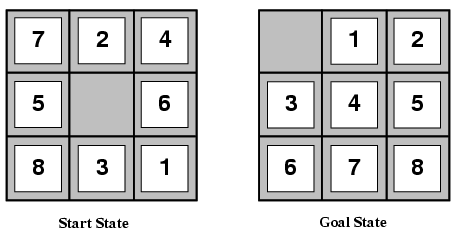
## Implemented Algorithms
- A* search
- Iterative Deepening

# Things to do
We have to go through 2 stages
## Stage 1: Build the program (coding)
State representation: a matrix. In python: list of list `[[0,1,2], [3,4,5], [6,7,8]]`

Current position of "blank" (which is 0 in matrix): `i,j`

To handle the edges, we have **Constrant 1 :** `0 <= i,j <=2`

Move "blank":
>- "blank" move up: `state[i][j]` make swap with `state[i-1][j]`
>- "blank" move right: `state[i][j]` make swap with `state[i][j+1]` <br>
> $\to$ Should pay attention to constraint 1, because if i = 0 $\to$ i-1 = -1 (wrong)<br>

You can add more variables if neccessary



In [18]:
from copy import deepcopy
import itertools
import random

In [19]:
class Node(object):
    def __init__(self, state, action='', depth=0, parent=None, cost=0):
        global size
        size = len(state)
        self.c = cost
        self.s = state
        self.d = depth
        self.a = action
        self.p = parent

    def set_cost(self,value):
        self.c = value
    def get_cost(self):
        return self.c
    def get_state(self):
        return deepcopy(self.s)
    def get_parent(self):
        return deepcopy(self.p)
    def get_action(self):
        return self.a
    def get_depth(self):
        return self.d
 
    def get_coordinate(self, num):
        '''return the coordinate of the number in matrix'''
        for i, j in itertools.product(range(size), repeat=2):
            if self.s[i][j] == num:
                return i, j
 
    def h(self, other):
        '''Heuristic function: manhattan distance'''
        man = 0
        for i, j in itertools.product(range(size), repeat=2):
            value = self.get_state()[i][j]
            if value != 0:
                x, y = other.get_coordinate(value)
                man += abs(i-x) + abs(j-y)
        return man
 
    def SuccessorFn(self):
        ''' return a list of (action,result) - the list of all possible action
        and corresponding result based on current state of node'''
        result = []
        actions = ('up', 'down', 'left', 'right')
        i, j = self.get_coordinate(0)
        toGo_position = ((i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1))
        for a, (x, y) in zip(actions, toGo_position):
            if x in range(size) and y in range(size):
                s = self.get_state()
                s[i][j], s[x][y] = s[x][y], s[i][j]
                if self.get_depth():
                    if self.get_parent().get_state() != s:
                        result.append((a, s))
                else: result.append((a,s))
        return result

    def Expand(self,goalNode):
        '''return a list of its successors'''
        global t
        successors = []
        for action, state in self.SuccessorFn():
            newNode = Node(state, action, self.get_depth() + 1, self)
            cost = newNode.h(goalNode) + newNode.get_depth()
            newNode.set_cost(cost)
            successors.append(newNode)
            t.addNode()
        return successors

    def delete(self):
        global t
        t.delNode()

## Algorithms
### Iterative Deepening
Basic idea: Depth-limited-search with increasing depth until finding the result

Depth-limited search: depth first search with depth limit

Detail pseudo code have been describled in the slide of lecture 3

### A* search
Basic idea: Expand unexpanded node with lowest evaluation value

n : current state

Evaluation function f(n) = g(n) + h(n)
- g(n) = cost so far to reach n - steps of "blank" from initial state to n
- h(n) = estimated cost from n to goal -  total Manhattan (L1) distance
- f(n) = estimated total cost of path through n to goal

Fringe: ordered node according to f(n)

In [20]:
def Astar(initNode, goalNode):
    fringe = [initNode]
    gone_state = []
    while fringe:
        node_to_expand = min(fringe, key = lambda x: x.get_cost())
        fringe.remove(node_to_expand)
        if node_to_expand.get_state() == goalNode.get_state():
            return node_to_expand
        gone_state.append(node_to_expand.get_state())
        for successor in node_to_expand.Expand(goalNode):
            if successor.get_state() not in gone_state:
                fringe.append(successor)
            else: successor.delete()
    return False

def Recursive_DLS(Node, limit, goalNode, gone_state):
    '''recursive function of Depth Limited Search
    return solution node, False or None - cutoff'''
    if Node.get_state() == goalNode.get_state(): return Node
    if Node.get_depth() == limit:
        Node.delete()
        return None
    has_cutoff = False
    gone_state.append(Node.get_state())
    for successor in sorted(Node.Expand(goalNode),key = lambda x:x.get_cost()):
        if successor.get_state() not in gone_state:
            result = Recursive_DLS(successor,limit,goalNode,gone_state)
            if result: return result
            if result == None: has_cutoff = True
        else: successor.delete()
    if has_cutoff:
        Node.delete()
        return None
    return False
 
def Iterative_Deepening(initNode, goalNode):
    for depth in itertools.count():
        result = Recursive_DLS(initNode, depth, goalNode,[])
        if result != None:
            return result

In [21]:
def make_key(state):
    return tuple(i for row in state for i in row)

def DepthFirstSearch(Node, goalNode, bound):
    global solved, solution, trans
    if Node.h(goalNode) == 0:
        solved = True
        solution = Node
        return 0
    successors = Node.Expand(goalNode)
    for s in successors:
        key = make_key(s.get_state())
        if key in trans:
            s.set_cost(1 + trans[key])
        else:
            s.set_cost(1 + s.h(goalNode))
    new_bound = float('inf')
    successors.sort(key = lambda x: x.get_cost())
    for s in successors:
        if s.get_cost() <= bound:
            b = 1 + DepthFirstSearch(s, goalNode, bound - 1)
        else:
            b = s.get_cost()
        if solved: return b
        new_bound = min(new_bound,b)
    trans[make_key(Node.get_state())] = new_bound
    return new_bound

def IDA(initNode, goalNode):
    global solved, solution, trans
    solved, solution, trans = False, None, {}
    bound = initNode.h(goalNode)
    while True:
        bound = DepthFirstSearch(initNode, goalNode, bound)
        if solved:
            return solution

## Stage 2: Evaluation and report
Increase the matrix size, and apply the same algorithms. Analyze the changes that occur

### Outputs
* Time complexity (number of nodes expanded in order to solve the puzzle)
* Space complexity (number of nodes kept in memory)
* The sequence of moves from the blank tile to solve the puzzle (solution) or, if there is no possible solution, print “Unsolvable”


Multiple puzzles **(at least 50)** should be generated and solved (or not, if they were not solvable).


The above-mentioned indicators must therefore be aggregated (averaged for instance) before being analyzed in the report.


In [22]:
class Tracker(object):
    def __init__(self, time = 0, space = 0):
        '''
        Time complexity (number of nodes expanded)
        Space complexity (number of nodes kept in memory)
        '''
        self.time = time
        self.space = space
    def addNode(self,number = 1):
        self.time += number
        self.space += number
    def delNode(self,number = 1):
        self.space -= number
    def __str__(self):
        return 'Time complexity (number of nodes expanded): %i \n\
Space complexity (number of nodes kept in memory): %i' %(self.time,self.space)

In [23]:
# Check whether problem is solvable
def inversions(state):
    '''Calculate total inversions of state'''
    flat_s = [i for row in state for i in row]
    return sum(sum(1 for i in range(k+1,len(state)**2) \
                   if flat_s[i] < flat_s[k] and flat_s[i]) \
                for k in range(len(state)**2))

def solvable(gstate, s):
    return not (inversions(gstate) - inversions(s)) % 2

In [24]:
#Printing
def print_state(node):
    i,j = node.get_coordinate(0)
    s = node.get_state()
    s[i][j] = ' '
    print('\n'.join('|'.join(str(i) for i in row) for row in s))

def Print_solution(node):
    if not node.get_depth():
        print_state(node)
        print('----------------------------')
        return
    Print_solution(node.get_parent())
    print('Go ' + node.get_action())
    print_state(node)
    print('Cost: ', node.get_cost())
    print('Depth: ', node.get_depth())
    print('----------------------------')

In [ ]:
def random_state(size):
    '''return a random state of 8 puzzle'''
    nums = list(range(size**2))
    state = []
    for left in range(size**2,0,-1):
        index = random.randint(0,left-1)
        if left % size == 0:
            state.append([nums.pop(index)])
        else:
            state[-1].append(nums.pop(index))
    return state

def generate_solvable_data(caseNum,matrix_size,mode):
    '''number: number of cases to generate
    matrix_size: size of puzzle
    mode - an alphabet, r for random and m for manual input'''
    result = []
    for n in range(caseNum):
        print('-------------------Instance',n)
        if mode == 'r':
            start = random_state(matrix_size)
            goal = random_state(matrix_size)
            while not solvable(goal,start):
                start = random_state(matrix_size)
                goal = random_state(matrix_size)
        elif mode == 'm':
            start, goal = [], []
            s = [int(n) for n in input('Type starting state: ').split()]
            g = [int(n) for n in input('Type goal state: ').split()]
            for k in range(len(s)):
                if k % len(s)**(1/2) == 0:
                    start.append([s[k]])
                    goal.append([g[k]])
                else:
                    start[-1].append(s[k])
                    goal[-1].append(g[k])
        yield (Node(start),Node(goal))

def Search(matrix_size, caseNum, input_mode, output_mode, algoFn):
    '''input_mode: 'r' for random input with number of instance
                   'm' for manual typing input
        output_mode: 'w' for write-to-file output
                    'n' for normal output on console
        caseNum: number of instances generated for data - int
        matrix_size: size of matrix - int
        algoFn: Function of algorithm implemented'''
    global t
    data = generate_solvable_data(caseNum, matrix_size, input_mode)
    f = open("data_" + algoFn.__name__+".txt", 'w')
    for initNode, goalNode in data:
        t = Tracker()
        t.addNode(2)
        print('Init:\n')
        print_state(initNode)
        print('\nGoal state:\n')
        print_state(goalNode)
        print('\nStart searching...\n')
        solNode = algoFn(initNode, goalNode)
        if output_mode == 'n':
            if solNode:
                Print_solution(solNode)
            else:
                print("Can't solve")
            print(t)
        elif output_mode == 'w':
            f.write('%i %i\n' % (t.time, t.space))
            print(t)
    f.close()

# 1 random case, matrix 3x3, 
#Search(3,1,'r','n', Astar)
#Search(3,1,'r','n', Iterative_Deepening)
#Search(3,1,'r','n', IDA)

# 1 large size case, matrix 3x3
#8 0 1 5 4 7 6 2 3
#1 6 8 0 4 2 5 7 3
#Search(3,1,'m','n', Astar)
#Search(3,1,'r','n', Iterative_Deepening) #can't run because it took so much time
#Search(3,1,'m','n', IDA)

# 1 random case, matrix 4x4
Search(4,1,'r','n', IDA)
# it take quite long so I will end the video here

-------------------Instance 0
Init:

4|2|10| 
1|9|6|7
5|3|15|8
12|13|11|14

Goal state:

4|6| |2
8|5|7|11
3|1|10|15
9|14|12|13

Start searching...

4|2|10| 
1|9|6|7
5|3|15|8
12|13|11|14
----------------------------
Go down
4|2|10|7
1|9|6| 
5|3|15|8
12|13|11|14
Cost:  45
Depth:  1
----------------------------
Go down
4|2|10|7
1|9|6|8
5|3|15| 
12|13|11|14
Cost:  44
Depth:  2
----------------------------
Go down
4|2|10|7
1|9|6|8
5|3|15|14
12|13|11| 
Cost:  43
Depth:  3
----------------------------
Go left
4|2|10|7
1|9|6|8
5|3|15|14
12|13| |11
Cost:  42
Depth:  4
----------------------------
Go up
4|2|10|7
1|9|6|8
5|3| |14
12|13|15|11
Cost:  41
Depth:  5
----------------------------
Go left
4|2|10|7
1|9|6|8
5| |3|14
12|13|15|11
Cost:  40
Depth:  6
----------------------------
Go up
4|2|10|7
1| |6|8
5|9|3|14
12|13|15|11
Cost:  39
Depth:  7
----------------------------
Go left
4|2|10|7
 |1|6|8
5|9|3|14
12|13|15|11
Cost:  38
Depth:  8
----------------------------
Go down
4|2|10|7
5|1|6|8
 |9|